In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from cafeen import utils

mpl.style.use('ggplot')

In [19]:
train = utils.read_data(test=False)

In [20]:
train = utils.encode_ordinal_features(train, utils.get_features(train.columns))

In [21]:
train = utils.group_features(train, ['nom_' + str(i) for i in range(5,10)], 50)

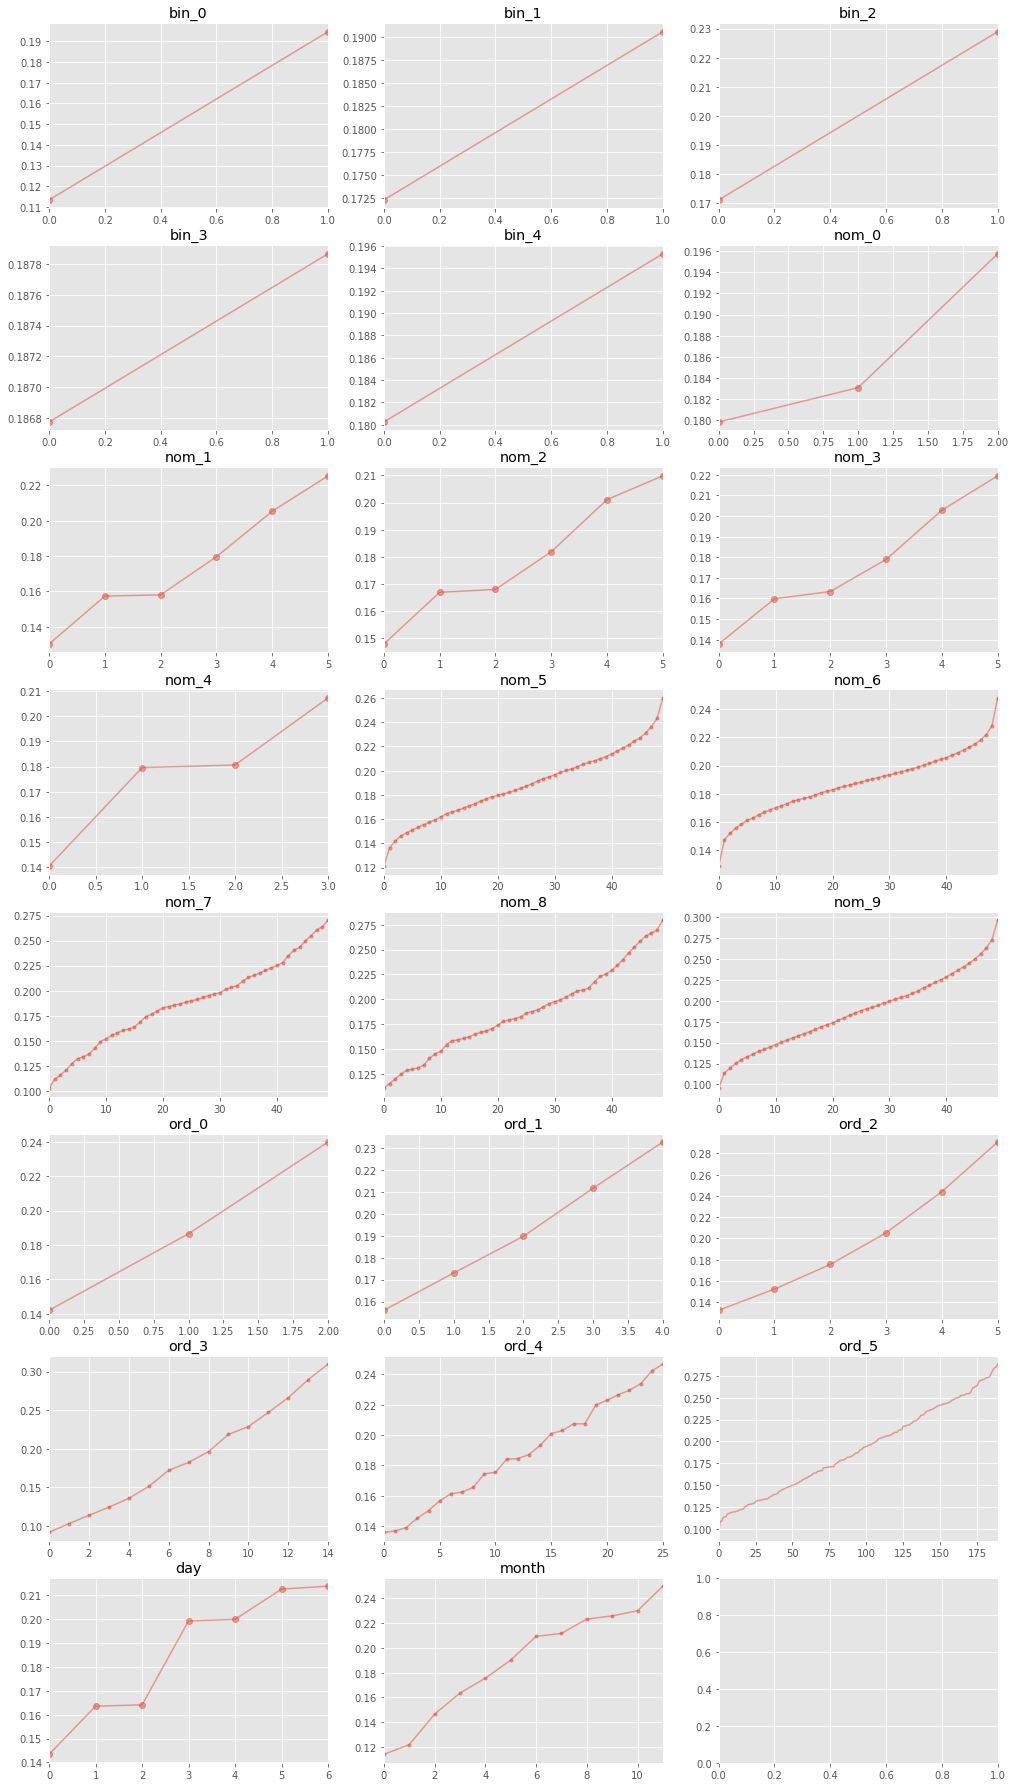

In [22]:
features = utils.get_features(train.columns)
ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(17,nrows * 4))

for i in range(nrows):
    for j in range(ncols):
        fid = ncols * i + j
        
        if fid < len(features):
            if train[features[fid]].nunique() <= 10:
                train.groupby(features[fid])['target'].mean().sort_values().reset_index(drop=True).plot(
                    ax=ax[i, j], alpha=0.5, title=features[fid], marker='o')
            elif train[features[fid]].nunique() <= 50:
                train.groupby(features[fid])['target'].mean().sort_values().reset_index(drop=True).plot(
                    ax=ax[i, j], alpha=0.5, title=features[fid], marker='.')
            else:
                train.groupby(features[fid])['target'].mean().sort_values().reset_index(drop=True).plot(
                    ax=ax[i, j], alpha=0.5, title=features[fid])
            ax[i, j].set_xlabel('')